# OpenCV

- skip_exec: true


In [ ]:
from pathlib import Path

import numpy as np
import cv2
from PIL import Image

PROJECT_ROOT = Path.cwd().parent.parent


## Contours


Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. Before finding contours, apply threshold or canny edge detection.
- In OpenCV, finding contours is like finding a white object on black background. So the object to be found should be white and the background should be black.


In [ ]:
def show(img: np.ndarray, scale: float):
    return Image.fromarray(img).resize((int(img.shape[1] * 0.25), int(img.shape[0] * 0.25)))


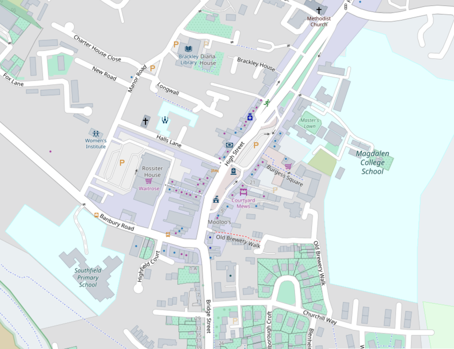

In [ ]:
img = cv2.imread(f"{PROJECT_ROOT}/data/brackley_map.png")
show(img, 0.25)


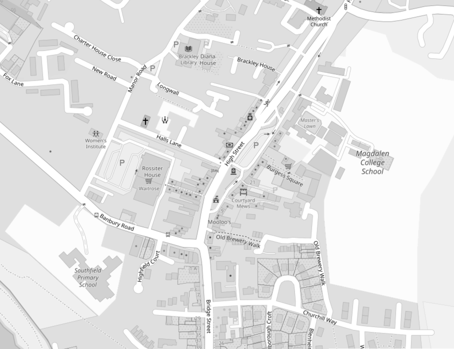

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img_gray, 0.25)


In [ ]:
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)


In [ ]:
ret


127.0

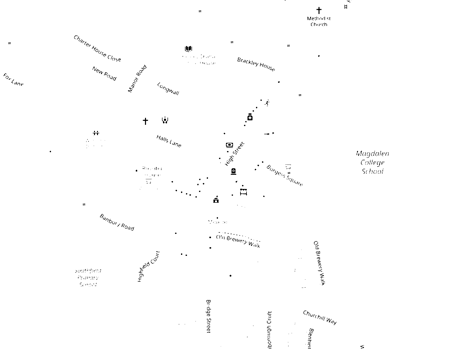

In [ ]:
show(thresh, 0.25)


In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


There are 3 arguments in `cv.findContours()`:

### The source image

### The contour retrieval mode

### Contour Approximation Method

Contours are the boundaries of a shape with same intensity. OpenCV stores the (x,y) coordinates of the boundary of a shape. Whether it stores all the coordinates is specified by the contour approximation method.

If you pass `cv.CHAIN_APPROX_NONE`, all the boundary points will be stored. But do we need all the points? e.g. if you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we just need the two end points of that line. This is what `cv.CHAIN_APPROX_SIMPLE` does. It removes all redundant points and compresses the contour, thereby saving memory.

It outputs:

- Contours, a list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.


To draw contours, `cv.drawContours()` is used. It can be used to draw any shape provided you have its boundary points. Its arguments are:

- The source image
- a list of contours,
- The index of contours (useful when drawing an individual contour. To draw all contours, pass -1)
- Color, thickness etc


To draw all the contours in an image:


In [ ]:
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

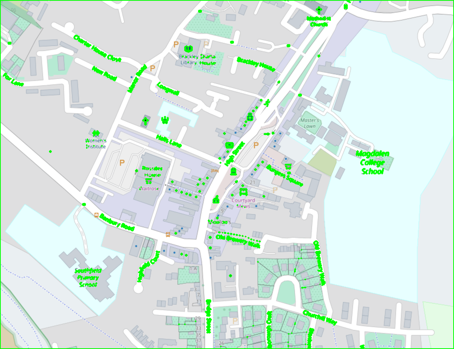

In [ ]:
show(img, 0.25)


To draw an individual contour, say 4th contour:


In [ ]:
cv2.drawContours(img, contours, 3, (0, 255, 0), 3)


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

But most of the time, the below method will be useful:


In [ ]:
cnt = contours[4]
cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

## Contour Features


In [ ]:
img = cv2.imread(f"{PROJECT_ROOT}/data/brackley_map.png")
thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(thresh, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]

### Image Moment


Image moments help you to calculate some features like center of mass or area of the object. The function cv.moments() gives a dictionary of all moment values calculated.


In [ ]:
M = cv2.moments(cnt)

print(M)


{'m00': 18.0, 'm10': 26030.0, 'm01': 25102.0, 'm20': 37642337.0, 'm11': 36300272.666666664, 'm02': 35006145.33333333, 'm30': 54435189123.0, 'm21': 52494305766.333336, 'm12': 50622752172.833336, 'm03': 48818047302.0, 'mu20': 64.7777777784354, 'mu11': -8.444444443639895, 'mu02': 11.777777775981576, 'mu30': -12.61728898538739, 'mu21': 2.0987655809396197, 'mu12': 1.6234642072223873, 'mu03': -0.7160334160613768, 'nu20': 0.19993141289640554, 'nu11': -0.026063100134691035, 'nu02': 0.03635116597525178, 'nu30': -0.00917877633925695, 'nu21': 0.001526801825517828, 'nu12': 0.0011810314299800333, 'nu03': -0.0005208972058160166}


From this, you can extract useful data like area, centroid etc. The centroid is given by the relations, $C_x = \frac{M_{10}}{M_{00}}$ and $C_y=\frac{M_{01}}{M_{00}}$.


In [ ]:
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

print(cx, cy)


1446 1394


The contour area is given by the function `cv.contourArea()` or from moments, `M['m00']`.


In [ ]:
area = cv2.contourArea(cnt)

area


18.0

The contour perimetre is also called the arc length. It can be found out using `cv.arcLength()`. The second argument specifies whether the shape is a closed contour or just a curve.


In [ ]:
perimeter = cv2.arcLength(cnt, True)

perimeter

18.485281229019165

### Contour Approximation


It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm. Check the wikipedia page for algorithm and demonstration.

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn't get a perfect square, but a "bad shape" (As shown in first image below). Now you can use this function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.


In [ ]:
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)


In [ ]:
epsilon

1.8485281229019166

In [ ]:
approx

array([[[1442, 1395]],

       [[1450, 1394]]], dtype=int32)

In [ ]:
cv2.drawContours(thresh, [approx], -1, (0, 255, 0), 3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

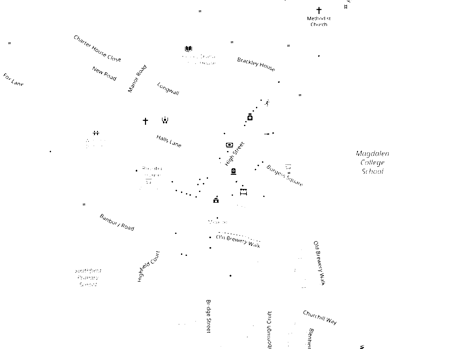

In [ ]:
show(thresh, 0.25)